In [1]:
using CSV
using DataFrames
using VMLS
using StatsPlots

In [2]:
ads_df = CSV.File("Data/Advertising.csv") |> DataFrame!

,Column1,TV,Radio,Newspaper,Sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


In [3]:
names(ads_df)

5-element Array{Symbol,1}:
 :Column1  
 :TV       
 :Radio    
 :Newspaper
 :Sales    

In [4]:
polyfit(x,y,p) = vandermonde(x,p) \ y
polyeval(theta,x) = vandermonde(x, length(theta))*theta

polyeval (generic function with 1 method)

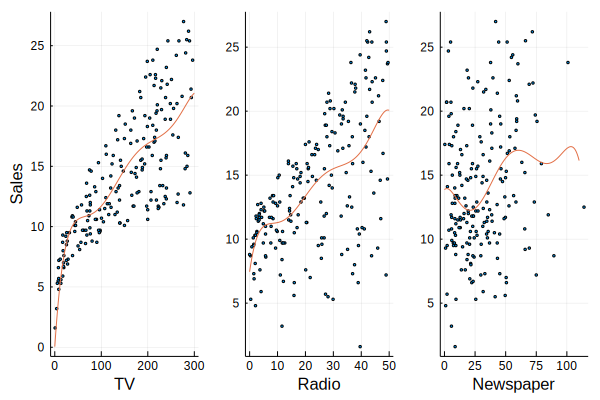

In [56]:
dial = 7

TV = vcat([ads_df.TV]...)
Radio = vcat([ads_df.Radio]...)
Newspaper = vcat([ads_df.Newspaper]...)
Sales = vcat([ads_df.Sales]...)

thetaTV = polyfit(TV,Sales,dial)
thetaRadio = polyfit(Radio,Sales,dial)
thetaNewspaper = polyfit(Newspaper,Sales,dial)

theta_plotTV = linspace(0,300,1000)
theta_plotRadio = linspace(0,50,1000)
theta_plotNewspaper = linspace(0,110,1000)

p = plot(layout=(1,3), legend = false)
scatter!(TV,Sales, subplot = 1, markersize = 1)
plot!(theta_plotTV,polyeval(thetaTV,theta_plotTV), subplot = 1, xlabel = "TV", ylabel = "Sales")


scatter!(Radio,Sales, subplot = 2, markersize = 1)
plot!(theta_plotRadio,polyeval(thetaRadio,theta_plotRadio), subplot = 2, xlabel = "Radio")

scatter!(Newspaper,Sales, subplot = 3, markersize = 1)
plot!(theta_plotNewspaper,polyeval(thetaNewspaper,theta_plotNewspaper), subplot = 3, xlabel = "Newspaper")


**Figure 2.1**
*The ```advertising``` data set. The plot displays sales, in thousands of units as a function of ```TV```, ```Radio```, and ```Newspaper``` budgets, in thousands of dollars for 200 different markets. In each plot we show the simple least squares fit@ of ```sales``` to that variables as described in chapter 3. In other words, each blue line represents a simple model that can be used to predict ```sales``` using ```TV```, ```radio```, and ```newspaper```, respectively.*

@$ In\; this\; example,\; I\; am\; using\; a\; polynomial\; fit,\; to\; view\; a\; linear\; fit\; set\; dial = 2.$

In [57]:
income1_df = CSV.File("Data/Income2.csv") |> DataFrame!
income2_df = CSV.File("Data/Income2.csv") |> DataFrame!

,Column1,Education,Seniority,Income
,Int64,Float64,Float64,Float64
1,1,21.5862,113.103,99.9172
2,2,18.2759,119.31,92.5791
3,3,12.069,100.69,34.6787
4,4,17.0345,187.586,78.7028
5,5,19.931,20.0,68.0099
6,6,18.2759,26.2069,71.5045
7,7,19.931,150.345,87.9705
8,8,21.1724,82.069,79.811
9,9,20.3448,88.2759,90.0063


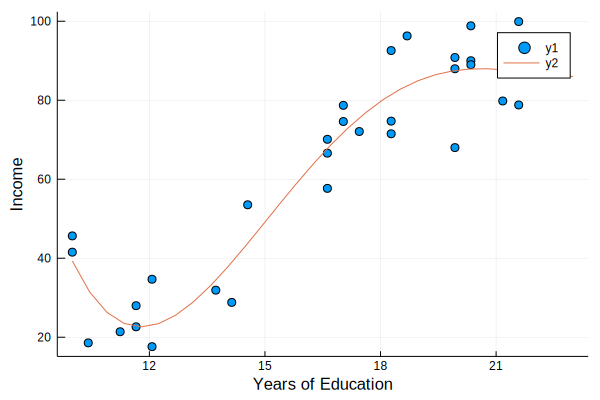

In [61]:
Edu = vcat([income1_df.Education]...)
Inc = vcat([income1_df.Income]...)
Sen = vcat([income1_df.Seniority]...)
scatter(Edu,Inc)
theta2 = polyfit(Edu,Inc,6)
t_plot = linspace(10,23,30)
plot!(t_plot,polyeval(theta2,t_plot), xlabel = "Years of Education", ylabel = "Income")